In [3]:

import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [47]:
# Define the paths to your image and annotation folders
path_image = "../data/external/Coral_images/image02"
path_annotations = "../data/external/Coral_images/annotation"

# Initialize lists to store images, labels, and masks
images = []
labels = []
masks = []

# Common image size (e.g., 224x224)
common_image_size = (224, 224)

# Iterate through each XML file in the annotation folder
for xml_filename in os.listdir(path_annotations):
    if xml_filename.lower().endswith(".xml"):
        xml_path = os.path.join(path_annotations, xml_filename)

        # Extract the corresponding image filename
        image_filename = xml_filename.replace(".xml", ".jpg")
        image_path = os.path.join(path_image, image_filename)

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"Image not found for XML: {xml_filename}")
            continue

        # Parse the XML file to extract the label and bounding box coordinates
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Initialize a mask for the original-sized image
        original_image = cv2.imread(image_path)
        original_mask = np.zeros(original_image.shape[:2], dtype=np.uint8)

        for object_elem in root.findall("object"):
            name_elem = object_elem.find("name")
            bndbox_elem = object_elem.find("bndbox")

            if name_elem is not None and bndbox_elem is not None:
                label = name_elem.text
                xmin = int(bndbox_elem.find("xmin").text)
                ymin = int(bndbox_elem.find("ymin").text)
                xmax = int(bndbox_elem.find("xmax").text)
                ymax = int(bndbox_elem.find("ymax").text)

                # Create a binary mask using the bounding box coordinates
                object_mask = np.zeros(original_image.shape[:2], dtype=np.uint8)
                object_mask[ymin:ymax, xmin:xmax] = 1

                # Add the object mask to the composite mask
                original_mask = np.maximum(original_mask, object_mask)

        # Resize the original-sized image and mask to the common size
        image = cv2.resize(original_image, common_image_size)
        mask = cv2.resize(original_mask, common_image_size)

        # Append the resized image and label to the lists
        images.append(image)
        labels.append(label)

        # Append the resized mask to the masks list
        masks.append(mask)

# Convert the lists to NumPy arrays
images = np.array(images)
masks = np.array(masks)
labels = np.array(labels)

# Now, you have NumPy arrays for the resized images, masks, and labels
print(f"Images shape: {images.shape}")
print(f"Masks shape: {masks.shape}")
print(f"Labels shape: {labels.shape}")
# Check class distribution
unique_labels, class_counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, class_counts):
    print(f"Class: {label}, Count: {count}")


Images shape: (899, 224, 224, 3)
Masks shape: (899, 224, 224)
Labels shape: (899,)
Class: APAL, Count: 113
Class: Pseudodiploria, Count: 786


In [52]:
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np

# # Your data shapes
# # Images shape: (899, 224, 224, 3)
# # Masks shape: (899, 224, 224)
# # Labels shape: (899,)

# # Number of image-mask pairs to display
# num_pairs_to_display = 5

# # Create a figure with subplots
# fig, axes = plt.subplots(num_pairs_to_display, 3, figsize=(8, 15))

# # Display the first 5 image-mask pairs
# for i in range(num_pairs_to_display):
#     image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
#     mask = masks[i]
#     label = labels[i]

#     # Create a new image with back part as blue and white part as red
#     back_mask = np.zeros_like(mask)
#     back_mask[mask == 0] = 1  # Set the back part of the mask to 1 (white)
#     red_mask = np.zeros_like(mask)
#     red_mask[mask != 0] = 1  # Set the white part of the mask to 1 (red)
#     blue_mask = np.zeros_like(mask)
#     blue_mask[mask == 0] = 1  # Set the back part of the mask to 1 (blue)

#     # Create a new mask with blue and red parts
#     combined_mask = np.stack([blue_mask, np.zeros_like(mask), red_mask], axis=-1)

#     # Convert the combined mask to a uint8 image (0 or 255 values)
#     combined_mask = combined_mask * 255

#     # Overlay the combined mask on top of the original image
#     overlay_image = cv2.addWeighted(image, 1, combined_mask, 0.7, 0)

#     # Plot the original image
#     axes[i, 0].imshow(image)
#     axes[i, 0].axis('off')

#     # Plot the modified mask with blue and red parts
#     axes[i, 1].imshow(combined_mask)
#     axes[i, 1].axis('off')

#     # Plot the overlay image
#     axes[i, 2].imshow(overlay_image)
#     axes[i, 2].set_title(f"Label: {label}")
#     axes[i, 2].axis('off')

# # Adjust spacing between subplots
# plt.tight_layout()

# # Show the plots
# plt.show()


In [34]:
# Filter images and labels for the "apal" class
apal_images = images[labels == "APAL"]
apal_labels = labels[labels == "APAL"]
apal_masks = masks[labels == "APAL"]
# Check the shape of the filtered data
print(f"Filtered APAL Images shape: {apal_images.shape}")
print(f"Filtered APAL Labels shape: {apal_labels.shape}")
print(f"Filtered APAL Labels shape: {apal_masks.shape}")

Filtered APAL Images shape: (113, 224, 224, 3)
Filtered APAL Labels shape: (113,)
Filtered APAL Labels shape: (113, 224, 224)


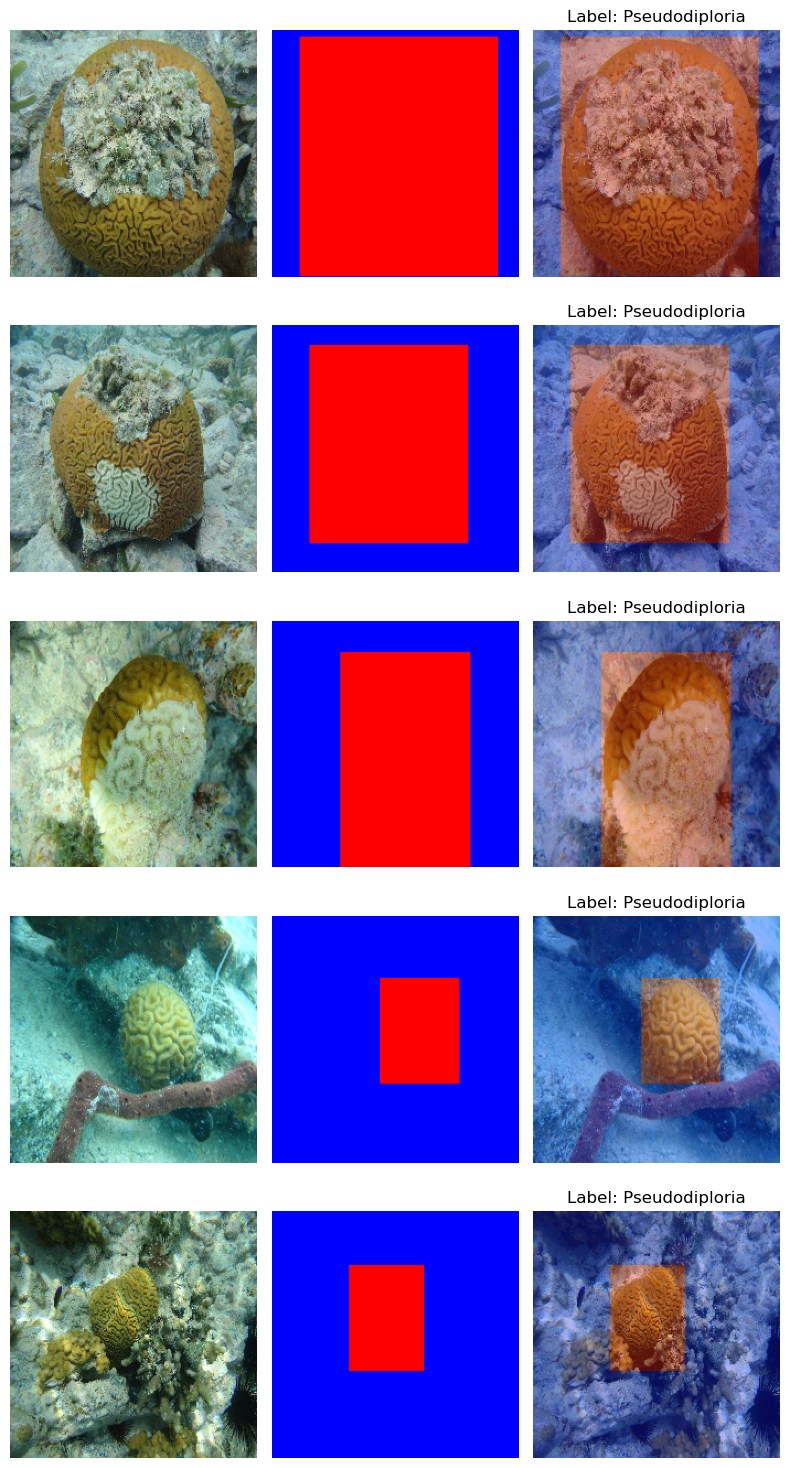

In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Your data shapes
# Images shape: (899, 224, 224, 3)
# Masks shape: (899, 224, 224)
# Labels shape: (899,)

# Number of image-mask pairs to display
num_pairs_to_display = 5

# Create a figure with subplots
fig, axes = plt.subplots(num_pairs_to_display, 3, figsize=(8, 15))

# Display the first 5 image-mask pairs
for i in range(num_pairs_to_display):
    image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    mask = masks[i]
    label = labels[i]

    # Create a blue mask for the back part
    blue_mask = (mask == 0).astype(np.uint8) * 255

    # Create a red mask for the white part
    red_mask = (mask != 0).astype(np.uint8) * 255

    # Create a new image with blue and red regions based on the masks
    combined_mask = np.zeros_like(image)
    combined_mask[:, :, 0] = red_mask  # Set the red channel to red_mask
    combined_mask[:, :, 2] = blue_mask  # Set the blue channel to blue_mask

    # Overlay the combined mask on top of the original image
    overlay_image = cv2.addWeighted(image, 0.7, combined_mask, 0.3, 0)

    # Plot the original image
    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')

    # Plot the modified mask with blue and red parts
    axes[i, 1].imshow(combined_mask)
    axes[i, 1].axis('off')

    # Plot the overlay image
    axes[i, 2].imshow(overlay_image)
    axes[i, 2].set_title(f"Label: {label}")
    axes[i, 2].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [30]:
# # Define the paths to your image and annotation folders
# path_image = "../data/external/Coral_images/image02"
# path_annotations = "/Users/sumaiyauddin/Documents/Semester03/Coral_images/APAL"

# # Initialize lists to store images, labels, and masks
# images = []
# labels = []
# masks = []

# # Common image size (e.g., 224x224)
# common_image_size = (224, 224)

# # Iterate through each XML file in the annotation folder
# for xml_filename in os.listdir(path_annotations):
#     if xml_filename.lower().endswith(".xml"):
#         xml_path = os.path.join(path_annotations, xml_filename)

#         # Extract the corresponding image filename
#         image_filename = xml_filename.replace(".xml", ".jpg")
#         image_path = os.path.join(path_image, image_filename)

#         # Check if the image file exists
#         if not os.path.exists(image_path):
#             print(f"Image not found for XML: {xml_filename}")
#             continue

#         # Parse the XML file to extract the label and bounding box coordinates
#         tree = ET.parse(xml_path)
#         root = tree.getroot()

#         # Initialize a mask for the original-sized image
#         original_image = cv2.imread(image_path)
#         original_mask = np.zeros(original_image.shape[:2], dtype=np.uint8)

#         for object_elem in root.findall("object"):
#             name_elem = object_elem.find("name")
#             bndbox_elem = object_elem.find("bndbox")

#             if name_elem is not None and bndbox_elem is not None:
#                 label = name_elem.text
#                 xmin = int(bndbox_elem.find("xmin").text)
#                 ymin = int(bndbox_elem.find("ymin").text)
#                 xmax = int(bndbox_elem.find("xmax").text)
#                 ymax = int(bndbox_elem.find("ymax").text)

#                 # Create a binary mask using the bounding box coordinates
#                 object_mask = np.zeros(original_image.shape[:2], dtype=np.uint8)
#                 object_mask[ymin:ymax, xmin:xmax] = 1

#                 # Add the object mask to the composite mask
#                 original_mask = np.maximum(original_mask, object_mask)

#         # Resize the original-sized image and mask to the common size
#         image = cv2.resize(original_image, common_image_size)
#         mask = cv2.resize(original_mask, common_image_size)

#         # Append the resized image and label to the lists
#         images.append(image)
#         labels.append(label)

#         # Append the resized mask to the masks list
#         masks.append(mask)

# # Convert the lists to NumPy arrays
# images2 = np.array(images)
# masks2 = np.array(masks)
# labels2 = np.array(labels)

# # Now, you have NumPy arrays for the resized images, masks, and labels
# print(f"Images shape: {images2.shape}")
# print(f"Masks shape: {masks2.shape}")
# print(f"Labels shape: {labels2.shape}")


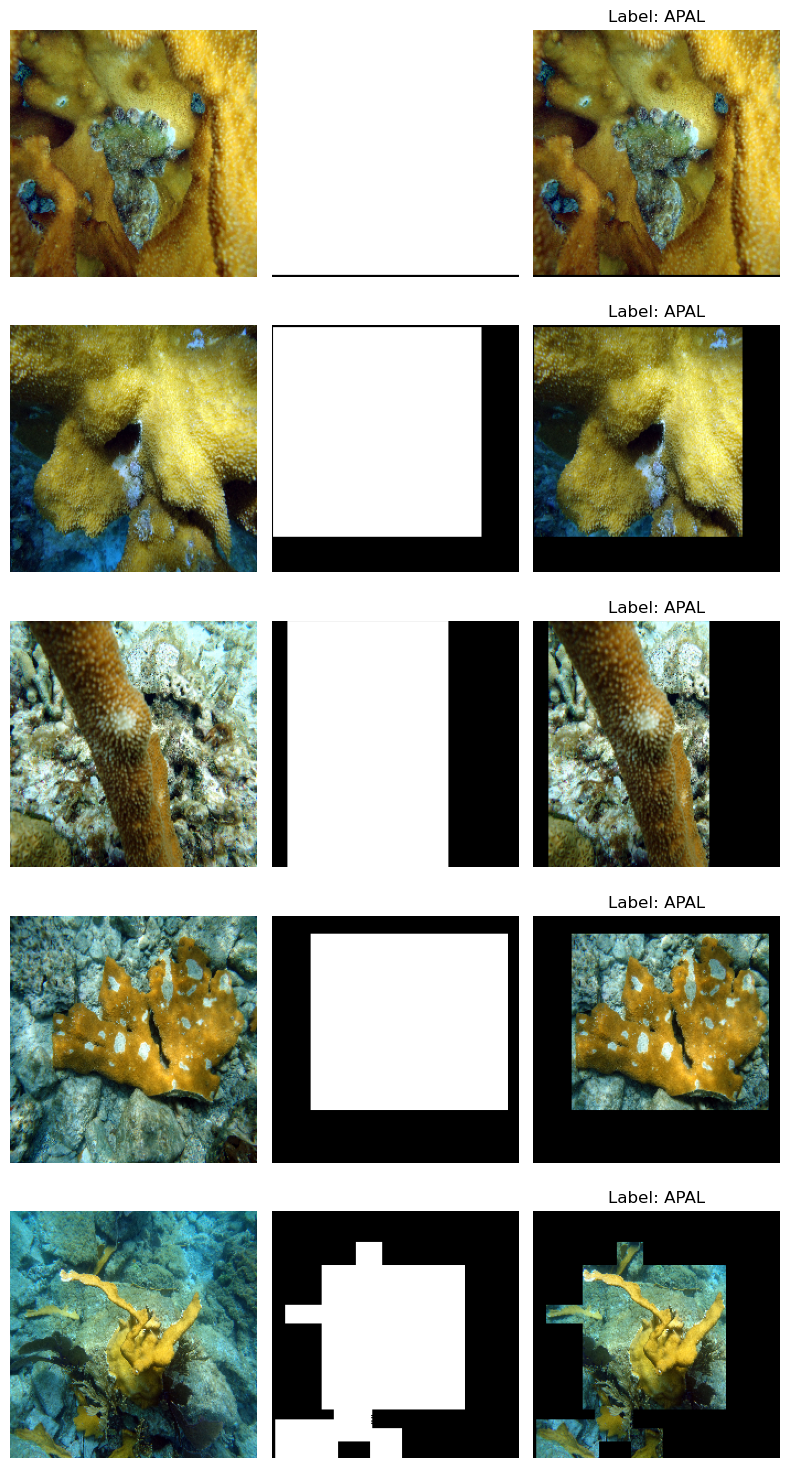

In [21]:
# Number of image-mask pairs to display
num_pairs_to_display = 5

# Create a figure with subplots
fig, axes = plt.subplots(num_pairs_to_display, 3, figsize=(8, 15))

# Display the first 5 image-mask pairs
for i in range(num_pairs_to_display):
    image = cv2.cvtColor(images2[i], cv2.COLOR_BGR2RGB)
    mask = masks2[i]
    label = labels2[i]

    # Create a new image with only the masked region
    masked_region = cv2.bitwise_and(image, image, mask=mask)

    # Plot the original image
    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')

    # Plot the mask
    axes[i, 1].imshow(mask, cmap='gray')
    axes[i, 1].axis('off')

    # Plot the masked region
    axes[i, 2].imshow(masked_region)
    axes[i, 2].set_title(f"Label: {label}")
    axes[i, 2].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [36]:
# Save the apal images to a pickle file
with open('images.pkl', 'wb') as file:
    pickle.dump(apal_images, file)

# Save the apal masks to a pickle file
with open('masks.pkl', 'wb') as file:
    pickle.dump(apal_masks, file)
    
# Save the apal labels to a pickle file
with open('labels.pkl', 'wb') as file:
    pickle.dump(apal_labels, file)


In [37]:


# Define the filenames for the pickle files
images2 = 'augmented_apal_images.pickle'
labels2 = 'augmented_apal_labels.pickle'
masks2 = 'augmented_apal_masks.pickle'

# Load the augmented images from the pickle file
with open(images2, 'rb') as file:
    images2 = pickle.load(file)

# Load the augmented labels from the pickle file
with open(labels2, 'rb') as file:
    labels2 = pickle.load(file)

# Load the augmented masks from the pickle file
with open(masks2, 'rb') as file:
    masks2 = pickle.load(file)
    
print("Loaded Images Shape:", images2.shape)
print("Loaded Labels Shape:", labels2.shape)
print("Loaded Masks Shape:", masks2.shape)




Loaded Images Shape: (565, 224, 224, 3)
Loaded Labels Shape: (565,)
Loaded Masks Shape: (565, 224, 224)


In [38]:
# Concatenate the loaded data
images = np.concatenate((images, images2), axis=0)
labels = np.concatenate((labels, labels2), axis=0)
masks = np.concatenate((masks, masks2), axis=0)

# Print the shape of the concatenated arrays
print("Concatenated Images Shape:", images.shape)
print("Concatenated Labels Shape:", labels.shape)
print("Concatenated Masks Shape:", masks.shape)


# Check class distribution
unique_labels, class_counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, class_counts):
    print(f"Class: {label}, Count: {count}")


Concatenated Images Shape: (1464, 224, 224, 3)
Concatenated Labels Shape: (1464,)
Concatenated Masks Shape: (1464, 224, 224)
Class: APAL, Count: 678
Class: Pseudodiploria, Count: 786


## Splitting for classification

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (936, 224, 224, 3)
y_train shape: (936,)
X_valid shape: (235, 224, 224, 3)
y_valid shape: (235,)
X_test shape: (293, 224, 224, 3)
y_test shape: (293,)


In [42]:
# Save your data to a pickle file
with open('../data/external/data_vgg16.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_test, y_test, X_valid, y_valid), f)

## Splitting for segmentation

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (936, 224, 224, 3)
y_train shape: (936, 224, 224)
X_valid shape: (235, 224, 224, 3)
y_valid shape: (235, 224, 224)
X_test shape: (293, 224, 224, 3)
y_test shape: (293, 224, 224)


In [45]:
# Save your data to a pickle file
with open('../data/external/data_mask.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_test, y_test, X_valid, y_valid), f)

### YOLO loading

In [11]:
# import os
# import cv2
# import numpy as np
# import xml.etree.ElementTree as ET

# # Define the paths to your image and annotation folders
# path_image = "../data/external/Coral_images/image02"
# path_annotations = "../data/external/Coral_images/annotation"

# # Initialize lists to store images and YOLO labels
# images = []
# yolo_labels = []

# # Common image size (e.g., 224x224)
# common_image_size = (224, 224)

# # Iterate through each XML file in the annotation folder
# for xml_filename in os.listdir(path_annotations):
#     if xml_filename.lower().endswith(".xml"):
#         xml_path = os.path.join(path_annotations, xml_filename)

#         # Extract the corresponding image filename
#         image_filename = xml_filename.replace(".xml", ".jpg")
#         image_path = os.path.join(path_image, image_filename)

#         # Check if the image file exists
#         if not os.path.exists(image_path):
#             print(f"Image not found for XML: {xml_filename}")
#             continue

#         # Parse the XML file to extract the label and bounding box coordinates
#         tree = ET.parse(xml_path)
#         root = tree.getroot()

#         # Initialize YOLO label string for the current image
#         yolo_label = ""

#         for object_elem in root.findall("object"):
#             name_elem = object_elem.find("name")
#             bndbox_elem = object_elem.find("bndbox")

#             if name_elem is not None and bndbox_elem is not None:
#                 label = name_elem.text
#                 # Add a check to process only objects with the correct label
#                 if label != "APAL":
#                     continue

#                 xmin = int(bndbox_elem.find("xmin").text)
#                 ymin = int(bndbox_elem.find("ymin").text)
#                 xmax = int(bndbox_elem.find("xmax").text)
#                 ymax = int(bndbox_elem.find("ymax").text)

#                 # Convert bounding box coordinates to YOLO format
#                 x_center = (xmin + xmax) / 2.0
#                 y_center = (ymin + ymax) / 2.0
#                 width = xmax - xmin
#                 height = ymax - ymin

#                 # Normalize coordinates and append to the YOLO label string
#                 yolo_label += f"{label} {x_center / common_image_size[0]} {y_center / common_image_size[1]} {width / common_image_size[0]} {height / common_image_size[1]}\n"

#         # Read and resize the image
#         image = cv2.imread(image_path)
#         image = cv2.resize(image, common_image_size)

#         # Append the resized image and YOLO label to the lists
#         images.append(image)
#         yolo_labels.append(yolo_label)



In [12]:
# # Convert the lists to NumPy arrays
# images = np.array(images)
# yolo_labels = np.array(yolo_labels)

# # Now, you have NumPy arrays for the resized images and YOLO labels
# print(f"Images shape: {images.shape}")
# print(f"YOLO Labels shape: {yolo_labels.shape}")

In [13]:
# import matplotlib.pyplot as plt

# # Function to draw bounding boxes on images
# def draw_boxes(image, yolo_label):
#     lines = yolo_label.split('\n')[:-1]  # Split lines and remove the empty last line
#     for line in lines:
#         values = list(map(float, line.split()[1:]))  # Skip the class index (label)

#         # Check if there are enough values (at least 4)
#         if len(values) >= 4:
#             label, x_center, y_center, width, height = values[:5]  # Take the first 5 values

#             # Convert YOLO coordinates back to original image coordinates
#             x_min = int((x_center - width / 2) * image.shape[1])
#             y_min = int((y_center - height / 2) * image.shape[0])
#             x_max = int((x_center + width / 2) * image.shape[1])
#             y_max = int((y_center + height / 2) * image.shape[0])

#             # Draw bounding box on the image
#             color = (0, 255, 0)  # Green color
#             thickness = 2
#             cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
#         else:
#             print(f"Invalid YOLO label: {line}")

#     return image

# # Number of images to display
# num_images_to_display = 3

# # Create subplots
# fig, axes = plt.subplots(num_images_to_display, 2, figsize=(10, 5 * num_images_to_display))

# for i in range(num_images_to_display):
#     # Display original image
#     axes[i, 0].imshow(images[i])
#     axes[i, 0].set_title('Original Image')

#     # Display image with bounding boxes
#     image_with_boxes = draw_boxes(images[i].copy(), yolo_labels[i])
#     axes[i, 1].imshow(image_with_boxes)
#     axes[i, 1].set_title('Image with Bounding Boxes')

# # Adjust layout and show the plots
# plt.tight_layout()
# plt.show()


In [10]:
# import os
# import cv2
# import numpy as np

# def load_and_resize_image(image_path, target_size=(224, 224)):
#     img = cv2.imread(image_path)
#     img = cv2.resize(img, target_size)
#     return img

# def load_yolo_labels(yolo_file_path):
#     with open(yolo_file_path, 'r') as f:
#         lines = f.readlines()
#     labels = [list(map(float, line.strip().split())) for line in lines]
#     return np.array(labels)

# image_folder = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image02"
# yolo_folder = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/yolo"

# target_size = (224, 224)

# images = []
# labels = []

# for image_file in os.listdir(image_folder):
#     if image_file.endswith((".jpg", ".JPG")):
#         image_path = os.path.join(image_folder, image_file)
#         yolo_file = os.path.join(yolo_folder, os.path.splitext(image_file)[0] + ".txt")

#         if os.path.exists(yolo_file):
#             image = load_and_resize_image(image_path, target_size)
#             yolo_labels = load_yolo_labels(yolo_file)

#             images.append(image)
#             labels.append(yolo_labels)

# # Filter out images without labels
# non_empty_indices = [i for i, label in enumerate(labels) if label.shape[0] > 0]
# images = np.array(images)[non_empty_indices]
# labels = np.array(labels)[non_empty_indices]

# # Check the shapes and print if necessary
# print(f"Images shape: {images.shape}, YOLO Labels shape: {labels.shape}")


In [55]:
import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET

# Define the paths to your image and annotation folders
path_image = "../data/external/Coral_images/image02"
path_annotations = "../data/external/Coral_images/annotation"

# Initialize lists to store images and YOLO labels
images = []
yolo_labels = []

# Common image size (e.g., 224x224)
common_image_size = (224, 224)

# Define the classes you want to include
target_classes = ["APAL", "Pseudodiploria"]
# Define the classes and their corresponding numeric labels
class_mapping = {"APAL": 0, "Pseudodiploria": 1}

# Iterate through each XML file in the annotation folder
for xml_filename in os.listdir(path_annotations):
    if xml_filename.lower().endswith(".xml"):
        xml_path = os.path.join(path_annotations, xml_filename)

        # Extract the corresponding image filename
        image_filename = xml_filename.replace(".xml", ".jpg")
        image_path = os.path.join(path_image, image_filename)

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"Image not found for XML: {xml_filename}")
            continue

        # Parse the XML file to extract the label and bounding box coordinates
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Initialize YOLO label string for the current image
        yolo_label = ""

        for object_elem in root.findall("object"):
            name_elem = object_elem.find("name")
            bndbox_elem = object_elem.find("bndbox")

            if name_elem is not None and bndbox_elem is not None:
                label = name_elem.text

                # Add a check to process only objects with the correct label
                if label not in target_classes:
                    continue

                xmin = int(bndbox_elem.find("xmin").text)
                ymin = int(bndbox_elem.find("ymin").text)
                xmax = int(bndbox_elem.find("xmax").text)
                ymax = int(bndbox_elem.find("ymax").text)

                # Convert bounding box coordinates to YOLO format
                x_center = (xmin + xmax) / 2.0
                y_center = (ymin + ymax) / 2.0
                width = xmax - xmin
                height = ymax - ymin

                # Normalize coordinates and append to the YOLO label string
                yolo_label += f"{label} {x_center / common_image_size[0]} {y_center / common_image_size[1]} {width / common_image_size[0]} {height / common_image_size[1]}\n"

        # Read and resize the image
        image = cv2.imread(image_path)
        image = cv2.resize(image, common_image_size)

        # Append the resized image and YOLO label to the lists
        images.append(image)
        yolo_labels.append(yolo_label)

# Convert the lists to numpy arrays
images = np.array(images)
yolo_labels = np.array(yolo_labels)

# Map class names to numeric labels
numeric_labels = []
for label in yolo_labels:
    parts = label.split()
    class_name = parts[0]  # Assuming the class name is the first part of the YOLO label
    numeric_label = class_mapping.get(class_name, -1)  # Use -1 for unknown classes
    numeric_labels.append(numeric_label)

labels = np.array(numeric_labels)

# Check the shapes
print(f"Images shape: {images.shape}, Numeric Labels shape: {labels.shape}")



Images shape: (899, 224, 224, 3), Numeric Labels shape: (899,)


In [15]:
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Print unique YOLO labels along with their counts
print("Unique YOLO Labels and Counts:")
for label, count in zip(unique_labels, label_counts):
    print(f"Label:\n{label}\nCount: {count}\n")


Unique YOLO Labels and Counts:
Label:
0
Count: 116

Label:
1
Count: 783



In [34]:
# Initialize count for images in APAL class
apal_image_count = 0

# Iterate through each YOLO label
for label in yolo_labels:
    # Split the label string into parts
    parts = label.split()

    # Check if the label is for the "APAL" class
    if len(parts) > 0 and parts[0] == "APAL":
        apal_image_count += 1

# Print the count
print(f"Number of images in 'APAL' class: {apal_image_count}")


Number of images in 'APAL' class: 116


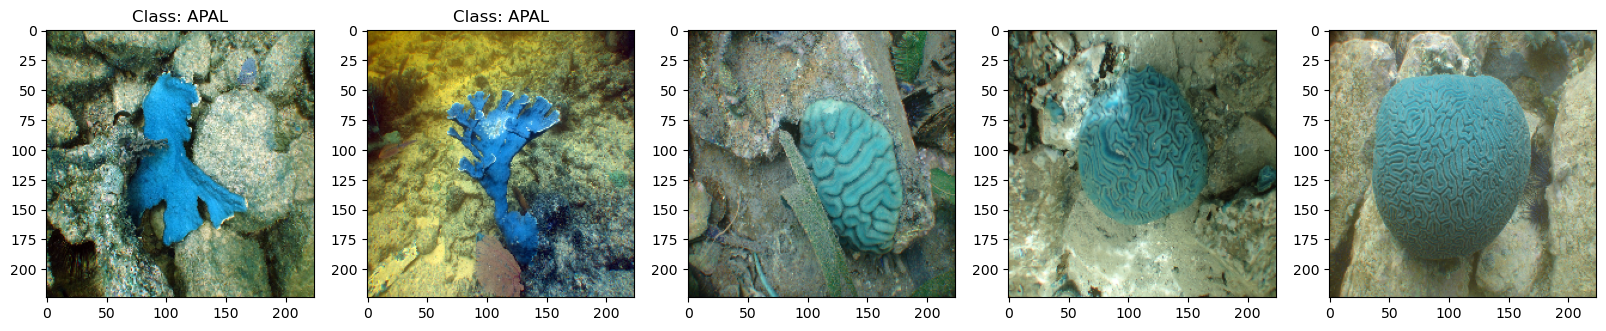

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Choose five random indices for images to plot
indices_to_plot = np.random.choice(len(images), 5, replace=False)

# Set up subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, idx in enumerate(indices_to_plot):
    # Plot the image
    axes[i].imshow(images[idx])

    # Parse YOLO label for bounding box information
    label_info = yolo_labels[idx].split()
    
    # Skip if the label is empty
    if len(label_info) == 0:
        continue

    class_name = label_info[0]

    # Skip if the class name is not 'APAL'
    if class_name != 'APAL':
        continue

    x_center, y_center, width, height = map(float, label_info[1:])

    # Convert YOLO coordinates to image coordinates
    x_min = int((x_center - width / 2) * common_image_size[0])
    y_min = int((y_center - height / 2) * common_image_size[1])
    bbox_width = int(width * common_image_size[0])
    bbox_height = int(height * common_image_size[1])

    # Create a rectangle patch
    rect = patches.Rectangle((x_min, y_min), bbox_width, bbox_height, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    axes[i].add_patch(rect)

    # Set plot title with class name
    axes[i].set_title(f"Class: {class_name}")

plt.show()


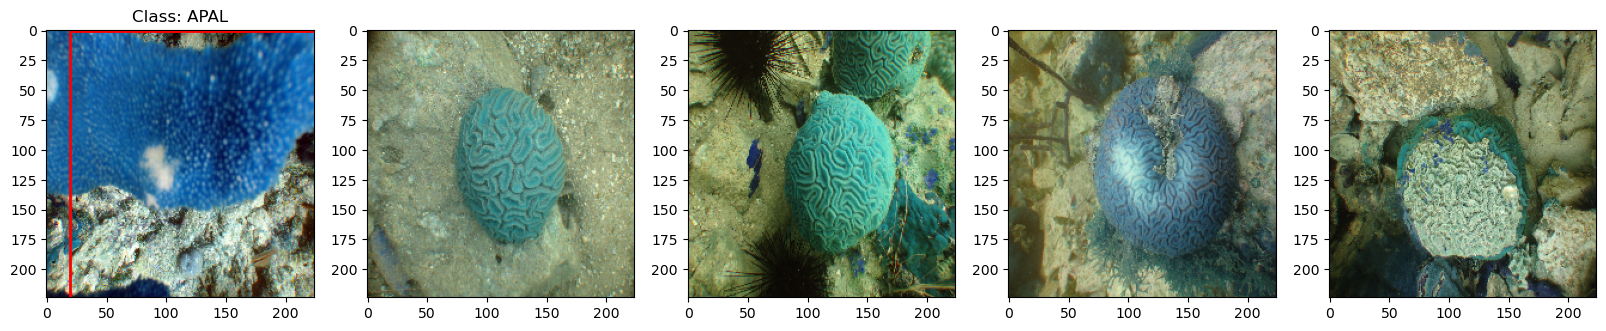

In [41]:
# Choose five random indices for images to plot
indices_to_plot = np.random.choice(len(images), 5, replace=False)

# Set up subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, idx in enumerate(indices_to_plot):
    # Plot the image
    axes[i].imshow(images[idx])

    # Parse YOLO label for bounding box information
    label_info = yolo_labels[idx].split()

    # Skip if the label is empty or does not contain valid float values
    if len(label_info) < 5:
        continue

    class_name = label_info[0]

    # Skip if the class name is not 'APAL'
    if class_name != 'APAL':
        continue

    try:
        x_center, y_center, width, height = map(float, label_info[1:])
    except ValueError:
        continue

    # Convert YOLO coordinates to image coordinates
    x_min = int((x_center - width / 2) * common_image_size[0])
    y_min = int((y_center - height / 2) * common_image_size[1])
    bbox_width = int(width * common_image_size[0])
    bbox_height = int(height * common_image_size[1])

    # Create a rectangle patch
    rect = patches.Rectangle((x_min, y_min), bbox_width, bbox_height, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    axes[i].add_patch(rect)

    # Set plot title with class name
    axes[i].set_title(f"Class: {class_name}")

plt.show()


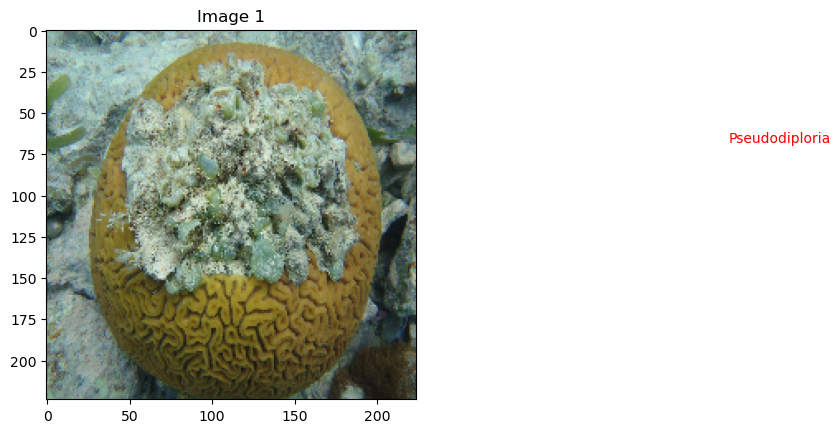

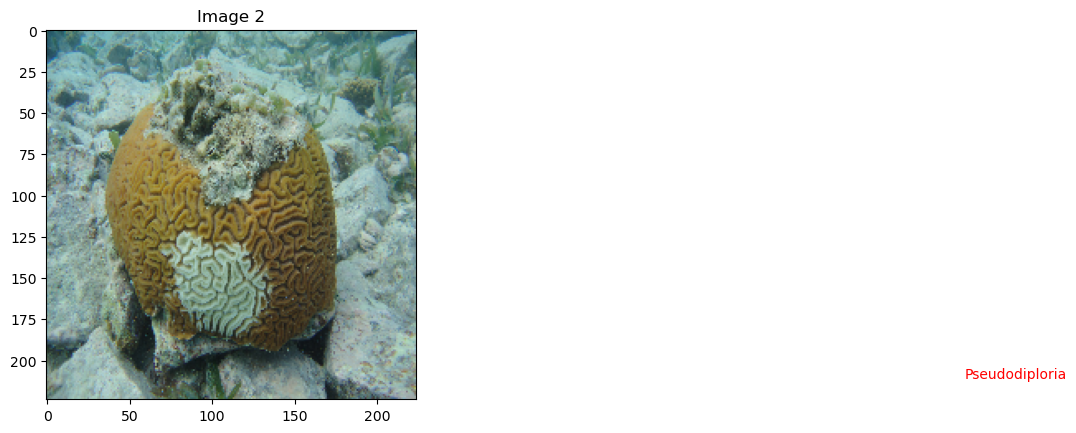

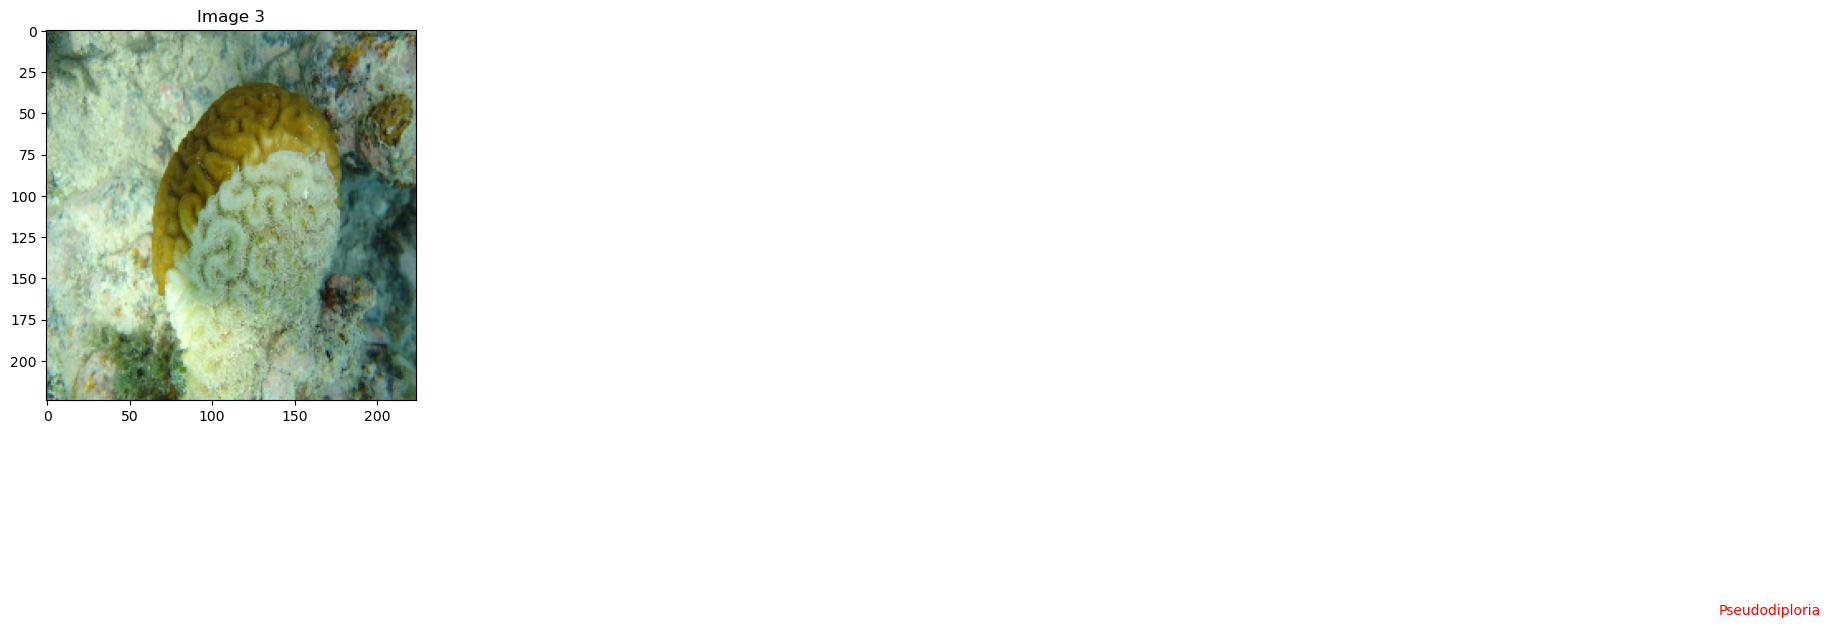

In [20]:
import cv2
import matplotlib.pyplot as plt

# Choose three random indices for images
indices = [0, 1, 2]  # Change these indices as needed

# Iterate through selected indices
for index in indices:
    # Get the image and its YOLO label
    image = images[index]
    yolo_label = yolo_labels[index]

    # Convert YOLO label to list of bounding box information
    bbox_info = [info.split() for info in yolo_label.strip().split('\n')]

    # Plot the image with bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Parse and plot each bounding box
    for info in bbox_info:
        label, x_center, y_center, width, height = info
        x_center, y_center, width, height = map(float, [x_center, y_center, width, height])

        # Convert YOLO coordinates to image coordinates
        x_center *= image.shape[1]
        y_center *= image.shape[0]
        width *= image.shape[1]
        height *= image.shape[0]

        # Calculate bounding box coordinates
        x_min = int(x_center - width / 2)
        y_min = int(y_center - height / 2)
        x_max = int(x_center + width / 2)
        y_max = int(y_center + height / 2)

        # Plot the bounding box
        plt.gca().add_patch(plt.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none'))
        plt.text(x_min, y_min - 5, f"{label}", color='r')

    plt.title(f"Image {index + 1}")
    plt.show()


In [4]:
# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [5]:
print(extract_info_from_xml('/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/annotation/APAL01.xml'))

{'bboxes': [{'class': 'APAL', 'xmin': 456, 'ymin': 1087, 'xmax': 3138, 'ymax': 1948}, {'class': 'APAL', 'xmin': 6, 'ymin': 2098, 'xmax': 1135, 'ymax': 2701}, {'class': 'APAL', 'xmin': 6, 'ymin': 1666, 'xmax': 410, 'ymax': 2051}], 'filename': 'APAL01.jpg', 'image_size': (3648, 2736, 3)}


In [22]:
import os
import random
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Define the path to your image and annotation folder
path_data = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/yolo"

# Get a list of YOLO-formatted annotation files
annotations = [os.path.join(path_data, x) for x in os.listdir(path_data) if x.endswith(".txt")]
annotations.sort()

# Define class ID to name mapping
class_id_to_name_mapping = {"APAL": 0, "Pseudodiploria": 1}

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), list(class_id_to_name_mapping.keys())[int(obj_cls)])
    
    plt.imshow(np.array(image))
    plt.show()

# Get 5 random annotation files 
random_annotations = random.sample(annotations, 5)

for annotation_file in random_annotations:
    with open(annotation_file, "r") as file:
        annotation_list = file.read().split("\n")[:-1]
        annotation_list = [x.split(" ") for x in annotation_list]
        annotation_list = [[float(y) for y in x] for x in annotation_list]

    # Get the corresponding image file with case-insensitive matching
    matching_images = [
        file for file in os.listdir(path_data)
        if file.lower().endswith(('.jpg', '.jpeg'))
    ]
    matching_images.sort()

    for ext in ['.jpg', '.jpeg']:
        image_file = annotation_file.replace(".txt", ext)
        if image_file.lower() in matching_images:
            break
    else:
        print(f"Error: Image file for annotation '{annotation_file}' does not exist.")
        continue


    # Check if the image file is a valid image
    try:
        image = Image.open(os.path.join(path_data, image_file))
    except Exception as e:
        print(f"Error: Unable to open image file '{image_file}'. {e}")
        continue

    # Plot the Bounding Box
    plot_bounding_box(image, annotation_list)


Error: Image file for annotation '/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/yolo/Pseudodiploria227.txt' does not exist.
Error: Image file for annotation '/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/yolo/Pseudodiploria463.txt' does not exist.
Error: Image file for annotation '/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/yolo/Pseudodiploria439.txt' does not exist.
Error: Image file for annotation '/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/yolo/Pseudodiploria363.txt' does not exist.
Error: Image file for annotation '/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/yolo/Pseudodiploria719.txt' does not ex

In [25]:
# # Assuming you have loaded the image and annotation_list before
# image_path = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/yolo/Pseudodiploria783.JPG"

# # Load the image
# image = Image.open(image_path)

# # Assuming annotation_list is already defined or loaded from somewhere
# # For demonstration purposes, let's create an empty annotation_list
# annotation_list = []

# # Call the plot_bounding_box function
# plot_bounding_box(image, annotation_list)


100%|██████████| 899/899 [00:00<00:00, 6728.79it/s]


Image file path: ../data/external/Coral_images/image02/Pseudodiploria338.jpg
Image file path: ../data/external/Coral_images/image02/Pseudodiploria338.jpg


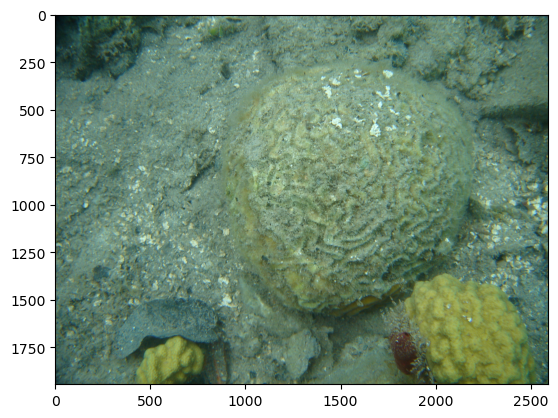

In [41]:
import os
import xml.etree.ElementTree as ET
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define the paths to your image and annotation folders
path_images = "../data/external/Coral_images/image02"
path_annotations = "../data/external/Coral_images/annotation"

# Create the "annotations" directory if it doesn't exist
output_annotations_dir = "../data/external/Coral_images/yolo/annotations"
os.makedirs(output_annotations_dir, exist_ok=True)

# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()

    # Initialise the info dict
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name
        if elem.tag == "filename":
            info_dict['filename'] = elem.text

        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))

            info_dict['image_size'] = tuple(image_size)

        # Get details of the bounding box
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text

                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)
            info_dict['bboxes'].append(bbox)

    return info_dict

# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"APAL": 0, "Pseudodiploria": 1}

# Convert the info dict to the required YOLO format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []

    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())

        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width = (b["xmax"] - b["xmin"])
        b_height = (b["ymax"] - b["ymin"])

        # Normalize the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]
        b_center_x /= image_w
        b_center_y /= image_h
        b_width /= image_w
        b_height /= image_h

        # Write the bbox details to the file
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))

    # Name of the file which we have to save
    save_file_name = os.path.join(output_annotations_dir, info_dict["filename"].replace("jpg", "txt").replace("JPG", "txt"))

    # Save the annotation to disk
    with open(save_file_name, "w") as file:
        file.write("\n".join(print_buffer))

# Get the annotations
annotations = [os.path.join(path_annotations, x) for x in os.listdir(path_annotations) if x.endswith(".xml")]
annotations.sort()

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)

# List of YOLO-style annotation files
annotation_files = [os.path.join(output_annotations_dir, x) for x in os.listdir(output_annotations_dir) if x.endswith(".txt")]

# Randomly select an annotation file
annotation_file = random.choice(annotation_files)

# Read the annotation file
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x] for x in annotation_list]

# Get the corresponding image file
image_file = annotation_file.replace("../data/external/Coral_images/yolo/annotations", "../data/external/Coral_images/image02").replace("txt", "jpg").replace("txt", "JPG")
print("Image file path:", image_file)
assert os.path.exists(image_file), f"Image file does not exist: {image_file}"




import numpy as np

def plot_bounding_box(image, annotation_list):
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    # Update the class mapping
    class_id_to_name_mapping = {0: "APAL", 1: "Pseudodiploria"}

    for ann in annotation_list:
        if ann:
            class_id, x_center, y_center, width, height = map(float, ann)
            
            # Convert YOLO format to image coordinates
            x0 = int((x_center - width / 2) * w)
            y0 = int((y_center - height / 2) * h)
            x1 = int((x_center + width / 2) * w)
            y1 = int((y_center + height / 2) * h)
            
            # Draw rectangle
            plotted_image.rectangle(((x0, y0), (x1, y1)), outline="red", width=10)
            
            # Display class name
            class_name = class_id_to_name_mapping[int(class_id)]
            plotted_image.text((x0, y0 - 10), f"{class_name}", fill="red")
    
    plt.imshow(np.array(image))
    plt.show()

# Read the annotation file
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x] for x in annotation_list]

# Get the corresponding image file
image_file = annotation_file.replace("../data/external/Coral_images/yolo/annotations", "../data/external/Coral_images/image02").replace("txt", "jpg").replace("txt", "JPG")
print("Image file path:", image_file)
assert os.path.exists(image_file), f"Image file does not exist: {image_file}"

# Load the image
image = Image.open(image_file)

# Plot the Bounding Box
plot_bounding_box(image, annotation_list)



In [43]:
image_BGR = cv2.imread('../data/external/Coral_images/image02/APAL01.jpg')
# Showing image shape
print('Image shape:', image_BGR.shape)  # tuple of (800, 1360, 3)

# Getting spatial dimension of input image
h, w = image_BGR.shape[:2]  # Slicing from tuple only first two elements

# Showing height an width of image
print('Image height={0} and width={1}'.format(h, w))

Image shape: (2736, 3648, 3)
Image height=2736 and width=3648


In [49]:
# Reading annotation txt file that has bounding boxes coordinates in YOLO format
with open('../data/external/Coral_images/yolo/annotations/APAL01.txt') as f:
    # Preparing list for annotation of BB (bounding boxes)
    lst = []
    for line in f:
        lst += [line.rstrip()]
        print(line)

# Going through all BB
for i in range(len(lst)):
    # Getting current bounding box coordinates, its width and height
    bb_current = lst[i].split()
    x_center, y_center = int(float(bb_current[1]) * w), int(float(bb_current[2]) * h)
    box_width, box_height = int(float(bb_current[3]) * w), int(float(bb_current[4]) * h)
    
    # Now, from YOLO data format, we can get top left corner coordinates
    # that are x_min and y_min
    x_min = int(x_center - (box_width / 2))
    y_min = int(y_center - (box_height / 2))

    # Drawing bounding box on the original image
    cv2.rectangle(image_BGR, (x_min, y_min), (x_min + box_width, y_min + box_height), [0 , 0, 255], 2)
    # Preparing text with label and confidence for current bounding box
    class_current = 'Class: {}'.format(bb_current[0])

    # Putting text with label and confidence on the original image
    cv2.putText(image_BGR, class_current, (x_min, y_min - 5), cv2.FONT_HERSHEY_COMPLEX, 1, [0 , 0, 255], 2)


0 0.493 0.555 0.735 0.315

0 0.156 0.877 0.309 0.220

0 0.057 0.679 0.111 0.141


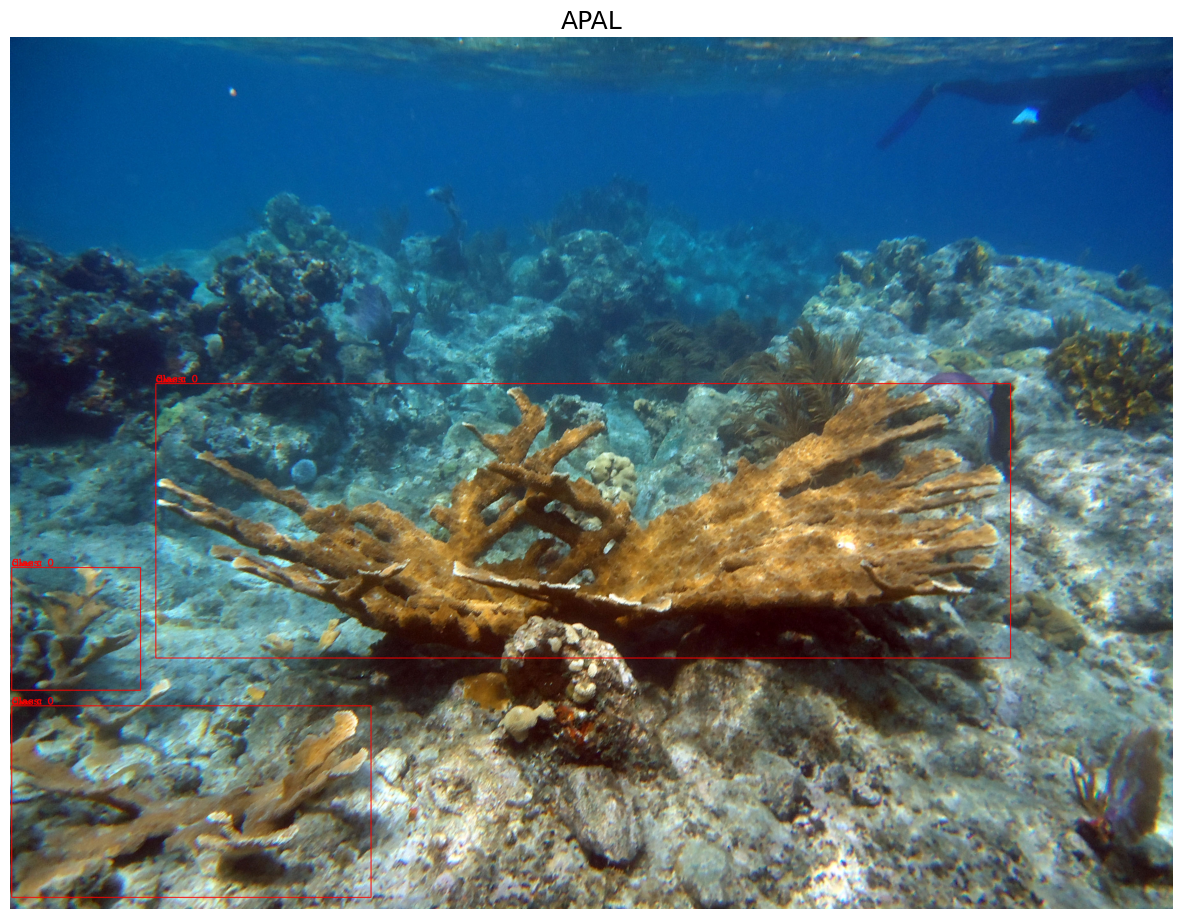

In [50]:
%matplotlib inline

# Plotting this example
# Setting default size of the plot
plt.rcParams['figure.figsize'] = (15, 15)

# Initializing the plot
fig = plt.figure()

plt.imshow(cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('APAL', fontsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('example.png')
plt.close()

In [53]:
import os
import cv2
import numpy as np

# Paths
image_folder = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/image02"
annotation_folder = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/yolo/annotations"

# Resize dimensions
resize_width, resize_height = 224, 224

# Initialize lists to store images and labels
images = []
labels = []

# Read YOLO annotations and corresponding images
for annotation_file in os.listdir(annotation_folder):
    if annotation_file.endswith(".txt"):
        # Construct paths
        annotation_path = os.path.join(annotation_folder, annotation_file)
        image_path = os.path.join(image_folder, annotation_file.replace(".txt", ".jpg"))

        # Read image
        image = cv2.imread(image_path)
        # Convert image to RGB (OpenCV uses BGR by default)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Read YOLO annotation
        with open(annotation_path, "r") as f:
            annotation_list = f.read().split("\n")[:-1]
            annotation_list = [x.split(" ") for x in annotation_list]
            annotation_list = [[float(y) for y in x] for x in annotation_list]

        # Extract class labels
        classes = [int(x[0]) for x in annotation_list]

        # Resize image
        resized_image = cv2.resize(image, (resize_width, resize_height))

        # Append to lists
        images.append(resized_image)
        labels.append(classes)

# Convert lists to NumPy arrays
images_array = np.array(images)
labels_array = np.array(labels)

# Print shapes
print("Images array shape:", images_array.shape)
print("Labels array shape:", labels_array.shape)


Images array shape: (899, 224, 224, 3)
Labels array shape: (899,)


/var/folders/ph/_s861md14q5c2ykky6q5pgd80000gn/T/ipykernel_51837/3305772169.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels_array = np.array(labels)


In [54]:
unique_labels, label_counts = np.unique(labels_array, return_counts=True)

# Print unique YOLO labels along with their counts
print("Unique YOLO Labels and Counts:")
for label, count in zip(unique_labels, label_counts):
    print(f"Label:\n{label}\nCount: {count}\n")

Unique YOLO Labels and Counts:
Label:
[]
Count: 809

Label:
[0]
Count: 18

Label:
[0, 0]
Count: 15

Label:
[0, 0, 0]
Count: 7

Label:
[0, 0, 0, 0, 0]
Count: 2

Label:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Count: 1

Label:
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Count: 1

Label:
[0, 1, 1, 1, 1, 1, 1]
Count: 1

Label:
[1]
Count: 34

Label:
[1, 1]
Count: 7

Label:
[1, 1, 1]
Count: 4

